# Customer Behavior

In today's competitive business, it is vital to understand the long-term value of a customer. Customer Lifetime Value (CLTV) is a metric that represents the total amount of money a customer is expected to spend in your business or your products during their lifetime. It's a crucial measure that helps businesses in strategizing their marketing efforts, resource allocation and product development.

IMPORTANCE OF CLTV:

Resource Allocation: It helps in allocatingresources more efficiently. Instead of spreading resources over all customers, businesses can focus on those who bring in the most value.

Product Development and Pricing Strategies: Understanding the lifetime value of a customer can influence product development strategies. Businesses can design products and services nthat cater to the needs of their most profitable customers. It also helps in setting pricing strategies that maximize profit without losing valuable customers.

Predictive Analysis: It helps in forecasting future revenues and making informed decisions about potential investments in customer acquisition and retention.

Focused Marketing and Customer retention: It enables businesses to identify the most valuable customers, allowing for more targeted and personalized marketing strategies. By understanding who your high-value customers are, you can tailor your marketing efforts to retain these profitable segments.

OVERVIEW OF RFM ANALYSIS
RFM(RECENCY, FREQUENCY, MONETARY) Analysis is a marketing technique used for quantifying and evaluating customer behaviour. It segments customers based on their tranaction history - how recently and how often they purchased, and how much they spent.

Recency(R): This is the measure of how recently a customer has made a purchase. A recent purchase is a strong indicator that the customer is active and more likely to buy again.

Frequency(F): This accesses how often a customer makes a purchase. Frequent buyers are more likely to continue purchasing in the future, indicating higher loyalty, satisfaction and engagement. While infrequent purchases suggests a need for re-engagement strategies.

Monetary Value(M): This evaluates how much money a customer has spent over time. Customers who spend more are the valuable. This determines the customer's value to the business. High monetary customers contribute more to revenue, while lower spenders may require targeted strategies to increase their purchasing activity.
To successfully perform RFM, our dataset must have some crucial features:

Customer Identifier: A unique identifier for each customer to differentiate between customers and aggregate purchases on a per-customer basis.

Transaction/Purchase Date: Date and time the purchases were made to calculate the Recency component of RFM.

Transaction Value: The monetary value of each transaction to compute the Monetary component of RFM, which is total amount spent by the customer.

Transaction Frequency (Optional): Information on the frequency of transactions. It can as well be done by counting the number of transactions per customer.

IMPORTANCE OF RFM IN BUSINESS STRATEGIES
By integrating RFM analysis into business strategies, companies can:

Optimize Marketing Campaigns: RFM analysis can drive more effective marketing campaigns by targeting the right customers with the right message at the right time.

Improve Customer Service: Understanding different segments helps in tailoring customer service efforts to meet the specific needs and preferences of each group.

Increase Customer Loyalty: By focusing on customers who are more likely to make frequent and recent purchases, businesses can implement strategies to boost customer loyalty.

Identify Potential High-Value Customers: It helps in spotting customers with the potential to become high-value patrons based on their buying patterns.

Personalized Customer Engagement: It gives room for more personalized communications and offers, as customers are segmented based on their purchasing behaviour.

It is a great tool for business aiming to thrive in a customer-centric era. It helps in serving current customers and also in predicting and shaping future customer interactions and profitability.


## 1. Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/mac/Desktop/Project/behavior/Online Retail.xlsx'

df = pd.read_excel(path)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [14]:
df_infor = pd.DataFrame(df.dtypes,columns = ['dtypes'])
df_infor['unique'] = df.nunique().values
df_infor['null'] = df.isnull().sum().values
print(df_infor)


                     dtypes  unique    null
InvoiceNo            object   25900       0
StockCode            object    4070       0
Description          object    4223    1454
Quantity              int64     722       0
InvoiceDate  datetime64[ns]   23260       0
UnitPrice           float64    1630       0
CustomerID          float64    4372  135037
Country              object      38       0
Total               float64    6204       0


In [6]:
df['Total'] = df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
# Removing duplicates
df.drop_duplicates(inplace = True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
df.shape

(536641, 9)

## 2. EDA

# ANALYSIS RFM(RECENCY, FREQUENCY, MONETARY) 

In [15]:
#RECENCY

import datetime as dt


latest_date = df['InvoiceDate'].max() + dt.timedelta(days = 1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total': 'sum'
}).reset_index()

rfm.rename(columns = {
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total': 'MonetaryValue'
}, inplace = True)

In [16]:
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [17]:
#Recency score based on quantiles
#Assigning labels from 1-5,  1 being the lowest recency
rfm["Recency_score"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])

#Frequency score
rfm["Frequency_score"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])

#Combine Recency and Frequency scores to create RFM Segment
rfm["rfm_segment"] = rfm['Recency_score'].astype(str) + rfm['Frequency_score'].astype(str)

In [18]:
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,2,0.00,1,1,11
1,12347.0,2,182,4310.00,5,5,55
2,12348.0,75,31,1797.24,2,3,23
3,12349.0,19,73,1757.55,4,4,44
4,12350.0,310,17,334.40,1,2,12


In [19]:
#Mapping segments to their corresponding customer segments
segment_map = {
    r'[1-2][1-2]' : 'Hibernating',
    r'[1-2][3-4]' : 'At-Risk',
    r'[1-2]5' : "Can\'t Loose",
    r'3[1-2]' : 'About to Slip',
    r'33' : 'Need Attention',
    r'[3-4][4-5]' : 'Loyal Customers',
    r'41' : 'Promising',
    r'51' : 'New Customers',
    r'[4-5][2-3]' : 'Potential Loyalists',
    r'5[4-5]' : 'Champions',
}

#Mapping RFM segments to corresponding customer segments
rfm['rfm_segment'] = rfm['rfm_segment'].replace(segment_map, regex = True)

rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,2,0.00,1,1,Hibernating
1,12347.0,2,182,4310.00,5,5,Champions
2,12348.0,75,31,1797.24,2,3,At-Risk
3,12349.0,19,73,1757.55,4,4,Loyal Customers
4,12350.0,310,17,334.40,1,2,Hibernating


## 2. Data Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])

rfm_scaled

array([[ 2.32202285, -0.39205597, -0.23041952],
       [-0.89373323,  0.39329343,  0.29405454],
       [-0.1691956 , -0.26552745, -0.01171748],
       ...,
       [-0.83418219, -0.34406239, -0.20892947],
       [-0.87388289,  2.74497857,  0.01849636],
       [-0.48680114, -0.09536842, -0.00684511]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

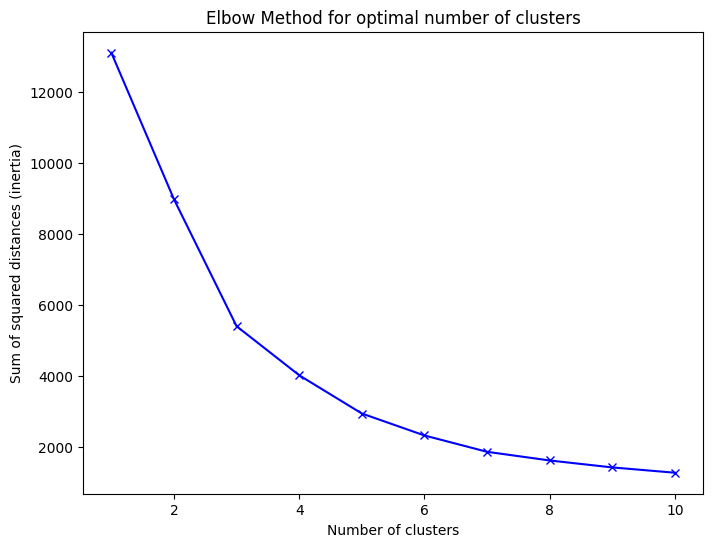

In [22]:
# phân cụm

from sklearn.cluster import KMeans

# Giả sử df_scaled là dữ liệu đã được chuẩn hóa
range_n_clusters = range(1, 11)
inertias = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (inertia)')
plt.title('Elbow Method for optimal number of clusters')
plt.show()

In [23]:
## Kmean cluster

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment,Cluster
0,12346.0,326,2,0.00,1,1,Hibernating,1
1,12347.0,2,182,4310.00,5,5,Champions,0
2,12348.0,75,31,1797.24,2,3,At-Risk,0
3,12349.0,19,73,1757.55,4,4,Loyal Customers,0
4,12350.0,310,17,334.40,1,2,Hibernating,1
...,...,...,...,...,...,...,...,...
4367,18280.0,278,10,180.60,1,1,Hibernating,1
4368,18281.0,181,7,80.82,1,1,Hibernating,1
4369,18282.0,8,13,176.60,5,1,New Customers,0
4370,18283.0,4,721,2045.53,5,5,Champions,0


In [26]:
rfm['Cluster'].value_counts()

Cluster
0    3258
1    1105
2       5
3       4
Name: count, dtype: int64

In [30]:
rfm.groupby('Cluster').agg(
    {
        'Recency': 'median',
        'Frequency': 'median',
        'MonetaryValue': 'median'
        
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,29.0,57.0,898.47
1,241.0,18.0,294.66
2,8.0,778.0,187322.17
3,1.5,5513.0,48494.98


In [31]:
rfm.groupby('rfm_segment').agg(
    {
        'Recency': 'median',
        'Frequency': 'median',
        'MonetaryValue': 'median'
        
    }
).round(2)

,Recency,Frequency,MonetaryValue
rfm_segment,,,
About to Slip,52.0,15.0,301.32
At-Risk,144.0,50.0,689.40
Can't Loose,114.0,155.0,2089.68
Champions,4.0,166.0,2619.81
Hibernating,212.0,12.0,251.36
Loyal Customers,29.0,117.5,1628.28
Need Attention,52.0,40.0,654.92
New Customers,7.5,8.5,204.00
Potential Loyalists,16.0,34.0,566.16


# RECOMMEND

## Nhóm khách hàng

1. Nhóm 0 có đặc điểm thời gian sử dụng dịch vụ là cách đây 29 ngày, dao động phổ biến 57 lần sử dụng dịch vụ và tổng gía trị phổ biến là 301.32.
Khách hàng này ít thường xuyên sử dụng dịch vụ và giá trị khá thấp, nên tạo thói quen cho khách hàng biết đến sản phẩm.
Bằng cách nhắn tin và gọi điện chăm sóc khách để khách biết nhiều về sản phẩm.

2. Nhóm 1 có đặc điểm thời gian sử dụng dịch vụ là cách đây 241 ngày, dao động phổ biến 18 lần sử dụng dịch vụ và tổng giá trị là 295. 
Khách hàng này có tỷ lệ rời bỏ tăng dần nếu không có chương trình khuyến mãi hoặc mua tặng kèm để níu chân khách hàng

3. Nhóm 2 có đặc điểm thời gian sử dụng dịch vụ là 8 ngày, dao động phổ biến 778 lần sử dụng dịch vụ và tổng gía trị 187322.17.
Khách hàng này thuộc khách hàng Dimond và cần phải chăm sóc đặc biệt, mỗi lần sử dụng dịch vụ là sử dụng dịch vụ có giá trị cao và tần suất sử dụng cũng nhiều.
Cần có 1 đội chăm sóc riêng và có line hỗ trợ riêng và dòng sản phẩm dành riêng cho tập này.

4. Nhóm 3 có đặc điểm thời gian sử dụng dịch vụ là 1,5 ngày, dao động phổ biến 5513 lần sử dụng dịch vụ và tổng giá trị là 48494.98.
Khác hàng này thuộc tập khách hàng trung thành và thỉnh thoảng nên có nhưng chương trình chi ân cho khách hàng này

## Phân khúc

1. About to Slip

Tập khách hàng này sử dụng dịch vụ là cách đây 52 ngày, 15 lần sử dụng dich vụ. Tổng giá trị là 301.
Nhóm khách hàng này đang không hứng thú với sản phẩm dịch vụ, cần có những ưu đãi đặc biệt cho họ để tạo thói quen khách hàng tìm sản phẩm và lựa chọn sản phẩm dịch vụ

2. At-Risk	

Tập khách hàng này sử dụng dịch vụ là cách đây 144 ngày, 50 lần sử dụng dịch vụ, tổng giá trị là 689.
Nhóm khách hàng này đang ở mức báo động cần có chương trình tương tác, nhắc nhớ và có chương trình khuyến mại để khách hàng mua lại.

3. Can't Loose

Tập khách hàng này sử dụng dịch vụ là cách đây 114.0, 155 lần sừ dụng dịch vụ, tổng giá trị là 2089.
Nhóm khách hàng này có thể rời bỏ. Nên tìm hiểu nguyên nhân sao khách hàng rời bỏ, và có chương trình giảm giá cho họ

4. Champions	

Tập khách hàng này sử dụng dịch vụ là cách đây 4 ngày, 166 lần sử dụng dịch vụ, tổng giá trị 2619.
Nhóm khách hàng này là nhóm khách hàng trung thành, nên có chiến dịch khuyến khích hàng quý và hàng năm. Nên giảm giá cho tổng giá trị đơn

5. Hibernating

Tập khách hàng sử dụng dịch vụ là cách đây 212 ngày, có 12 lần sử dụng dịch vụ, tổng giá trị 251.
Khảo sát và tìm hiểu nguyên nhân tại sao họ dừng mua hàng.

6. Loyal Customers

Tập khách hàng sử dụng dịch vụ là cách đây 29.0, có 117.5 lần sử dụng dịch vụ, tổng giá trị 1628.28.
Đây là những khách hàng mang lại nhiều khách hàng hơn nên cần có những ưu đãi cho họ khi giới thiệu cho họ.

7. Need Attention

Tập khách hàng sử dụng dich vụ là cách đây 52.0, có	40.0 lần sử dụng dịch vụ, tổng giá trị 654.92.

8. New Customers

Tập khách hàng sử dụng dịch vụ là cách đây 7.5, có 8.5 lần sử dụng dịch vụ, tổng giá trị 204.00.
Chào mừng họ bằng chương trình giảm giá hoặc khuyến mãi đặc biệt cho lần mua hàng tiếp theo của họ để khuyến khích hoạt động kinh doanh lặp lại.
Triển khai một loạt email giới thiệu để giới thiệu với họ về sản phẩm/dịch vụ của bạn.

9. Potential Loyalists

Tập khách hàng sử dụng dịch vụ là cách đây 16.0, có 34.0 lần sử dụng dịch vụ, tổng giá trị 566.16.
Đưa ra các ưu đãi để tăng tần suất mua hàng của họ, chẳng hạn như tiền thưởng giới thiệu hoặc phần thưởng dựa trên điểm.
Cung cấp các đề xuất sản phẩm được cá nhân hóa dựa trên các giao dịch mua trước đây của họ để nâng cao trải nghiệm mua sắm của họ.

10. Promising

Tập khách hàng sử dụng dịch vụ là cách đây 22, có 7 lần sử dụng dịch vụ, tổng giá trị 186.

